In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Data Preprocessing

## Data obtaining

In [2]:
raw_df = pd.read_csv('ArgentinaRemuneracion.csv')

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5767 entries, 0 to 5766
Data columns (total 50 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   estoy_trabajando_en                                                                   5767 non-null   object 
 1   donde_estas_trabajando                                                                5767 non-null   object 
 2   dedicacion                                                                            5767 non-null   object 
 3   tipo_de_contrato                                                                      5767 non-null   object 
 4   ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local                              5767 non-null   float64
 5   ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local                            

In [201]:
inputs = ['donde_estas_trabajando', 'dedicacion', 'tipo_de_contrato', 'recibis_algun_tipo_de_bono', 'tengo_edad', 'sueldo_dolarizado', 'seniority']
target = ['ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local']
inputs_df = raw_df[inputs+target].copy()

In [202]:
inputs_df['tengo_edad'] = pd.to_numeric(inputs_df['tengo_edad'], errors='coerce')
inputs_df.dropna(subset=['tengo_edad'], inplace=True)
inputs_df = inputs_df[(inputs_df['tengo_edad'] > 18) & (inputs_df['tengo_edad'] < 80)]
targets = inputs_df[target]
inputs_df = inputs_df.drop('ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local', axis=1)
inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5747 entries, 0 to 5766
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   donde_estas_trabajando      5747 non-null   object 
 1   dedicacion                  5747 non-null   object 
 2   tipo_de_contrato            5747 non-null   object 
 3   recibis_algun_tipo_de_bono  5747 non-null   object 
 4   tengo_edad                  5747 non-null   float64
 5   sueldo_dolarizado           5747 non-null   bool   
 6   seniority                   5747 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 319.9+ KB


## Data visualization

In [154]:
sns.set_theme()

Text(0, 0.5, 'Cuenta')

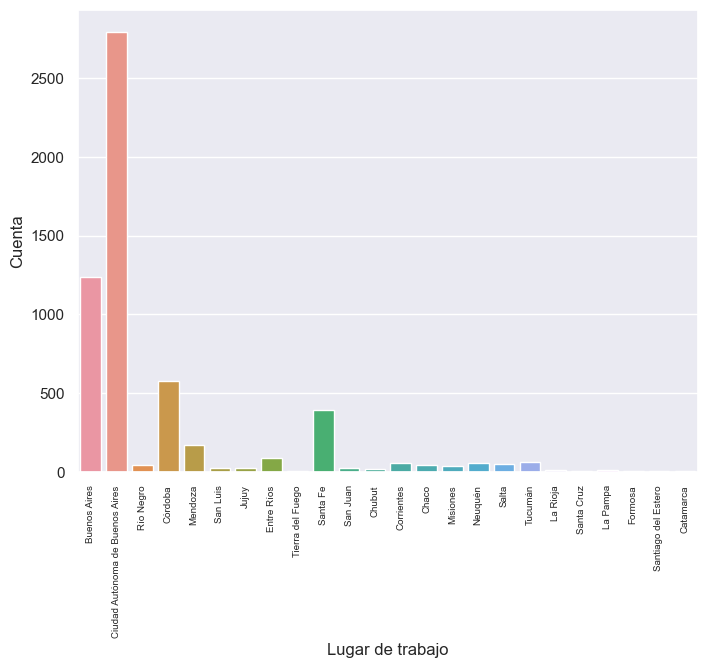

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.countplot(data=inputs_df, x='donde_estas_trabajando')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize=7);
ax.set_xlabel("Lugar de trabajo");
ax.set_ylabel("Cuenta")

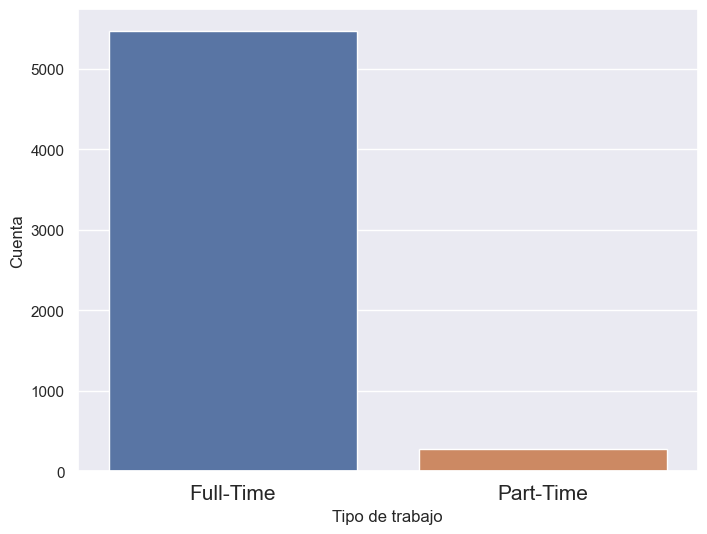

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.countplot(data=inputs_df, x='dedicacion')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15);
ax.set_xlabel("Tipo de trabajo");
ax.set_ylabel("Cuenta");

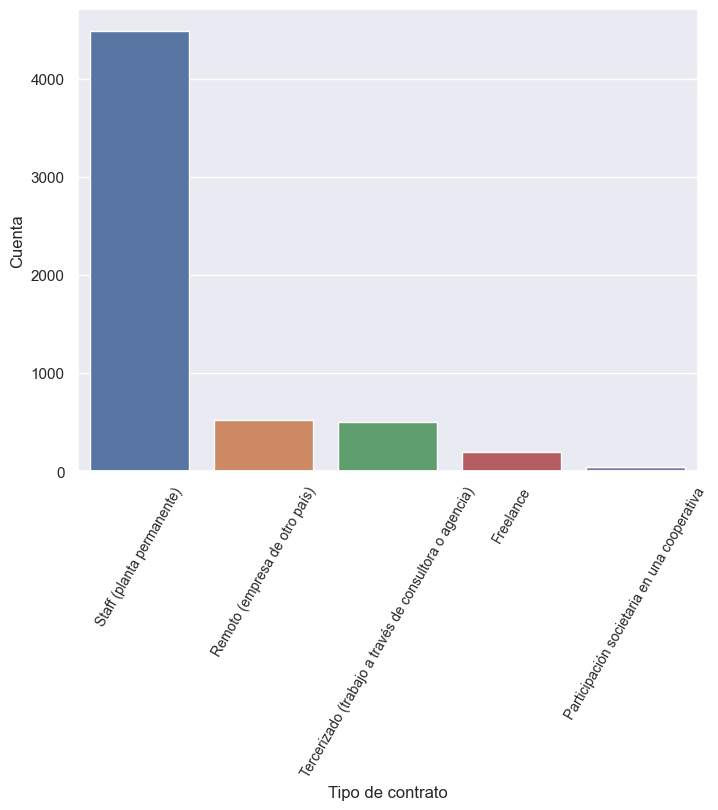

In [158]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.countplot(data=inputs_df, x='tipo_de_contrato')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=60);
ax.set_xlabel("Tipo de contrato");
ax.set_ylabel("Cuenta");

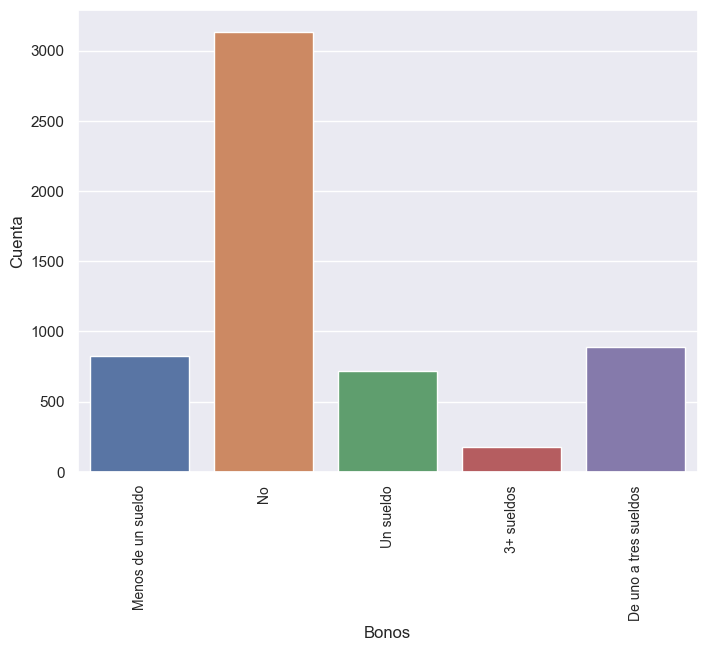

In [159]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.countplot(data=inputs_df, x='recibis_algun_tipo_de_bono')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90);
ax.set_xlabel("Bonos");
ax.set_ylabel("Cuenta");

## Data encoding & scaling

In [203]:
inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5747 entries, 0 to 5766
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   donde_estas_trabajando      5747 non-null   object 
 1   dedicacion                  5747 non-null   object 
 2   tipo_de_contrato            5747 non-null   object 
 3   recibis_algun_tipo_de_bono  5747 non-null   object 
 4   tengo_edad                  5747 non-null   float64
 5   sueldo_dolarizado           5747 non-null   bool   
 6   seniority                   5747 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 319.9+ KB


In [204]:
numeric_cols = inputs_df.select_dtypes(include='float64').columns.tolist()
categorical_cols = inputs_df.select_dtypes(include='object').columns.tolist()

In [206]:
scaler = StandardScaler()
scaler.fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [207]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [208]:
inputs_df

,donde_estas_trabajando,dedicacion,tipo_de_contrato,recibis_algun_tipo_de_bono,tengo_edad,sueldo_dolarizado,seniority,donde_estas_trabajando_Buenos Aires,donde_estas_trabajando_Catamarca,donde_estas_trabajando_Chaco,...,tipo_de_contrato_Staff (planta permanente),tipo_de_contrato_Tercerizado (trabajo a través de consultora o agencia),recibis_algun_tipo_de_bono_3+ sueldos,recibis_algun_tipo_de_bono_De uno a tres sueldos,recibis_algun_tipo_de_bono_Menos de un sueldo,recibis_algun_tipo_de_bono_No,recibis_algun_tipo_de_bono_Un sueldo,seniority_Junior,seniority_Semi-Senior,seniority_Senior
0,Buenos Aires,Full-Time,Staff (planta permanente),Menos de un sueldo,-1.056386,False,Semi-Senior,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),No,-0.801771,False,Junior,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),No,-1.565618,False,Junior,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),Un sueldo,-1.056386,False,Semi-Senior,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,Río Negro,Full-Time,Staff (planta permanente),Un sueldo,-1.183694,True,Junior,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5762,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),De uno a tres sueldos,0.725922,False,Senior,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5763,Tucumán,Full-Time,Staff (planta permanente),Un sueldo,0.853230,False,Senior,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5764,Buenos Aires,Part-Time,Freelance,No,-1.565618,False,Senior,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5765,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),No,-0.547155,False,Semi-Senior,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Train split

In [209]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)

# Data processing

In [212]:
tree = DecisionTreeRegressor()

In [215]:
tree.fit(train_inputs, train_targets)

DecisionTreeRegressor()

In [216]:
tree_train_preds = tree.predict(train_inputs)

In [219]:
tree_train_rmse = mean_squared_error(tree_train_preds, train_targets, squared=False)
tree_train_rmse

169220.96895450636

In [221]:
dummy = np.full(len(train_targets), targets.mean())

In [222]:
dummy_rmse = mean_squared_error(dummy, train_targets, squared=False)
dummy_rmse

299535.26367575506